# Gradient Descent from Scratch

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]

Here we want to use Gradient Descent to find parameter for the function

$${y_d} = \beta + w * {x_d}$$

## Vanilla Gradient Descent

The mathematic formulation for gradient descent can be written as follows:

<img src="pic/gd/gd2.png" width="200" height="400">

**`W`**: Weight

**`L`**: Loss function  

**`η`**: learning rate

**`∂L/∂W`**: the gradient of loss function over weights


In [3]:
x = np.arange(-200, -100, 1) # bias term
y = np.arange(-5, 5, 0.1) # weight
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)

In [4]:
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[i]
        Z[i][j] = 0
        for n in range(len(x_data)):
            Z[i][j] = Z[i][j] + (y_data[n] - b - w*x_data[n]) ** 2
        Z[i][j] = Z[i][j] / len(x_data)

In [5]:
def GD(x_data, y_data, bias, weight, lr, iteration):

    b = bias # initialize b
    w = weight # initialize w
    lr = lr # learning rate
    iteration = iteration # number of iteration

    # Store initial values for plotting
    b_history = [b]
    w_history = [w]

    # Iteration
    for i in range(int(iteration)):

        b_grad = 0.0
        w_grad = 0.0
        for n in range(len(x_data)): # Partial Derivative
            b_grad = b_grad - 2.0 * (y_data[n] - b - w*x_data[n])*1.0
            w_grad = w_grad - 2.0 * (y_data[n] - b - w*x_data[n])*x_data[n]

        # Update params
        b = b - lr * b_grad
        w = w - lr * w_grad

        # Store in the history
        b_history.append(b)
        w_history.append(w)
    
    return(b_history, w_history)

Text(0, 0.5, 'w')

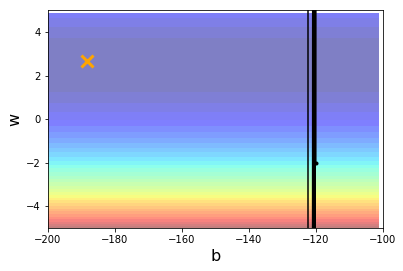

In [6]:
b_history, w_history = GD(x_data, y_data, bias=-120, weight=-2, lr=0.0005, iteration=1e6)

# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x',ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms = 3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel('b',fontsize=16)
plt.ylabel('w',fontsize=16)

Text(0, 0.5, 'w')

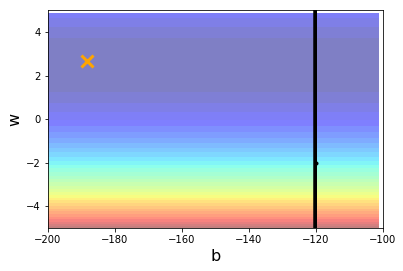

In [7]:
b_history, w_history = GD(x_data, y_data, bias=-120, weight=-2, lr=0.00005, iteration=1e6)

# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x',ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms = 3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel('b',fontsize=16)
plt.ylabel('w',fontsize=16)

---
# Gradient Descent Tips

## **Tip 1**: Tune your learning rates: `Adagrad`

<img src="pic/gd/gd.png" width="200" height="400">

The learning rate η is the shrinkage you do at every step you are making. 

* If you make 1 step at `η = 1.00`, the step weight is `1.00`. 
* If you make 1 step at `η = 0.25`, the step weight is `0.25`.

Note that 

* Increasing η makes computation faster (because you need to input less rounds). However, **you may end up hovering over the local minimum and never reach the minimum spot**. 
* Decreasing η makes computation slower (because you need to input more rounds). However, **you need more time(iterations) to let your gradient descent algorithm reach the local minimum**.

<img src="pic/gd/gdviz.png" width="300" height="300">

For each gradient descent, you should make sure that you plot out your loss function for each learning rate that you utilize.

Thus, you can understand whether your learning rate is above or below the preferred value and alter it accordingly.

### Now, how should we update our learning rate?

One simple approach is to **`reduce the learning rate along with each iterations`**.

* At the beginning, we are far away from the destination (local minimum), and thus use a larger learning rate.
* After several iterations, we are close to the destination, and thus should use a smaller learning rate.

In this way, we can confirm that loss will `decrease fast in the beginning`, and will `slow down so that we can reach local minimum` when it is at its neighbor. One common way of doing so is **learning rate decay**.

<img src="pic/gd/decay.png" width="200" height="400">

However, it would be a better idea if we can customize the learning rate of each parameter.

To fulfill this goal, we can introduce the adaptive gradient descent method **`adagrad`**.

<img src="pic/gd/adagrad.png" width="500" height="400">

**σ**    :    `Root Mean Square` of previous derivatives of parameter *w*

Remember that the numerator η is also time-dependent as mentioned. Therefore, we can derive that the **`adagrad`** can be formulated as velow.

<img src="pic/gd/adagrad2.png" width="350" height="300">

In [17]:
def adagrad(x_data, y_data, bias, weight, lr, iteration):

    b = bias # initialize b
    w = weight # initialize w
    lr = lr # learning rate
    iteration = iteration # number of iteration

    # Store initial values for plotting
    b_history = [b]
    w_history = [w]

    lr_b = 0
    lr_w = 0

    # Iteration
    for i in range(int(iteration)):

        b_grad = 0.0
        w_grad = 0.0
        for n in range(len(x_data)): # Partial Derivative
            b_grad = b_grad - 2.0 * (y_data[n] - b - w*x_data[n])*1.0
            w_grad = w_grad - 2.0 * (y_data[n] - b - w*x_data[n])*x_data[n]

        # Adagrad -- Give each param customized learning rate
        lr_b = lr_b + b_grad**2
        lr_w = lr_w + w_grad**2

        # Update params
        b = b - lr/np.sqrt(lr_b) * b_grad
        w = w - lr/np.sqrt(lr_w) * w_grad

        # Store in the history
        b_history.append(b)
        w_history.append(w)
    
    return(b_history, w_history)

Text(0, 0.5, 'w')

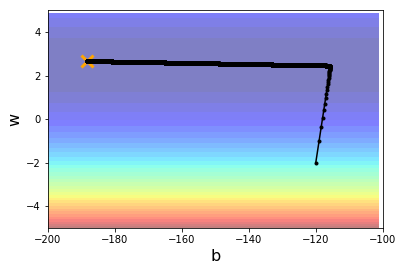

In [18]:
b_history, w_history = adagrad(x_data, y_data, bias=-120, weight=-2, lr=1, iteration=1e6)

# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x',ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms = 3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel('b',fontsize=16)
plt.ylabel('w',fontsize=16)

## **Tip 2**: Stochastic Gradient Descent

**`Stochastic Gradient Descent`** can make your gradient descent faster.

In general, parameters will be updated after seeing all the data and calculating the gradient.

<img src="pic/gd/loss.png" width="350" height="300">

Stochastic Gradient Descent, on the other hand, will update parameter after seeing **one** data point.

It's faster but less stable. Thus, it will contain more zigzags.

<img src="pic/gd/sgd.png" width="500" height="300">

In [19]:
def sgd(x_data, y_data, bias, weight, lr, iteration):

    b = bias # initialize b
    w = weight # initialize w
    lr = lr # learning rate
    iteration = iteration # number of iteration

    # Store initial values for plotting
    b_history = [b]
    w_history = [w]

    # Iteration
    for i in range(int(iteration)):

        for n in range(len(x_data)): # Partial Derivative
            # Reset gradient
            b_grad = 0.0
            w_grad = 0.0
            
            b_grad = b_grad - 2.0 * (y_data[n] - b - w*x_data[n])*1.0
            w_grad = w_grad - 2.0 * (y_data[n] - b - w*x_data[n])*x_data[n]

            # Update params upon seeing each data
            b = b - lr * b_grad
            w = w - lr * w_grad

        # Store in the history
        b_history.append(b)
        w_history.append(w)
    
    return(b_history, w_history)

In [34]:
sgd_xdata = x_data * 5
random.shuffle(sgd_xdata)
sgd_ydata = y_data * 5
random.shuffle(sgd_ydata)

Text(0, 0.5, 'w')

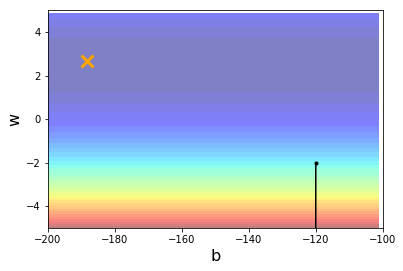

In [35]:
b_history, w_history = sgd(sgd_xdata, sgd_ydata, bias=-120, weight=-2, lr=1, iteration=1e6)

# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x',ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms = 3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel('b',fontsize=16)
plt.ylabel('w',fontsize=16)

## **Tip 3**: Feature Scaling

**`Feature Scaling`** can make each parameter update more efficient.

* **`Without feature scaling`** *(left plot)*, we can see that the first couple of gradients are not directed toward the local minimum. What it means is that the parameter upgrade is less efficient and will require more updates.
* **`With feature scaling`** *(right plot)*, each epoch will be similarly efficient. 

<img src="pic/gd/norm.png" width="600" height="300">

Some of the famous feature scaling methods are:
* **StandardScaler**
* **MinMaxScaler**

which can be applied using **`sklearn.preprocessing`**.

```python
from sklearn.preprocessing import StandardScaler, MinMaxScaler
```

---

## Reference:

[CS321n](http://cs231n.github.io/)